# Task 1 : TITANIC SURVIVAL PREDICTION

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
titanic_data = pd.read_csv('Titanic-Dataset.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


from above observation we cas see that the columns 'Age','Cabin','Embarked' have some missing values

In [6]:
# removing 'Cabin' column as it contains lot of missing values
titanic_data = titanic_data.drop(columns = 'Cabin',axis =1)

In [7]:
# as 'Age' column contain float values and it is missing less values we can replace them with the mean of the column
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace = True)

In [8]:
# the column 'Embarked' contains the string value and it is missing less value so we can replace it with the 
# mode value of the column
print(titanic_data['Embarked'].mode())
titanic_data['Embarked'].value_counts()

0    S
Name: Embarked, dtype: object


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
# from above we can see that 'S' is repeating more so we are replacing all missing values with 'S' 
#and 'S' positon is 0 is we replace 'S' with 0
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace = True)

In [10]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now no column value contains null value

Checking for total number of people survived 

In [11]:
# as mentioned 0 means 'Not Survived' and 1 means 'Survived'
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

from above observations we can see that total 549 people did not survived
and 342 people survived

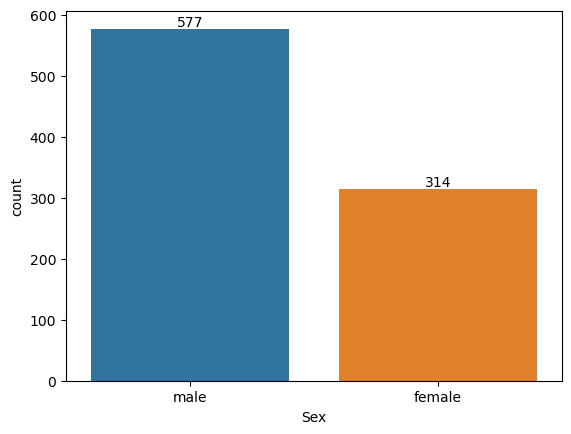

In [12]:
# total number of people based on their gender
ax = sns.countplot(data = titanic_data,x='Sex')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

Survived people based on their Gender

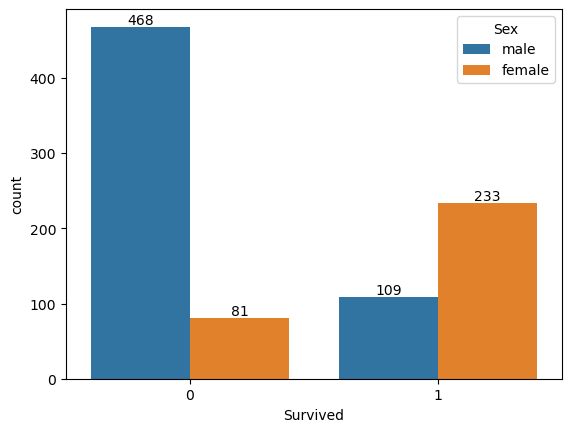

In [13]:
ax = sns.countplot(data = titanic_data , x='Survived',hue ='Sex')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

from above observations we can see that 109 men and 233 female survived whereas 468 men and 81 female did not survived

### Replacing the coulmn value 

In [14]:
# replacing the value of 'Sex' column value 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
titanic_data['Sex'] =labelencoder.fit_transform(titanic_data['Sex'])
titanic_data.head()
#  male is replaced as 1 and female is replaced as 0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [15]:
# replacing the Emberked values
titanic_data['Embarked'].replace({'S':0,'C':1,'Q':2},inplace = True)

In [16]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0


In [17]:
titanic_data['Embarked'].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

Total people survived based on passenger class

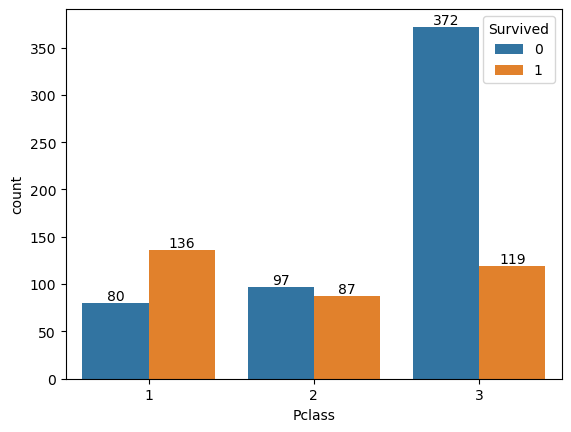

In [18]:
ax = sns.countplot(data = titanic_data, x='Pclass', hue ='Survived')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

Total number of people in passenger class based on Gender

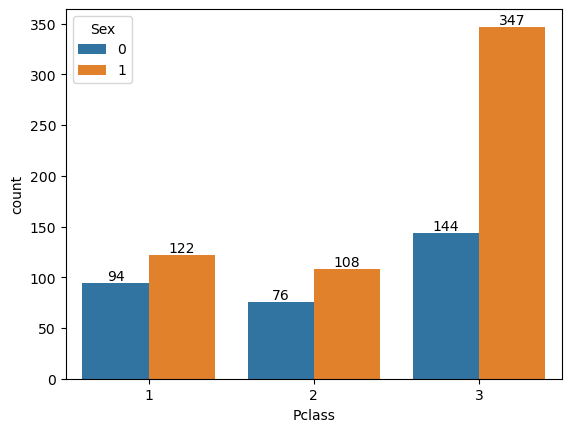

In [19]:
ax = sns.countplot(data = titanic_data , x='Pclass', hue ='Sex')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

### Building model 

In [20]:
df = titanic_data
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int32(1), int64(6), object(2)
memory usage: 73.2+ KB


In [22]:
X = df[['Age','Pclass','Sex']]
y = df['Survived']

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
model = LogisticRegression(random_state=0)
model.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [26]:
x_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(Y_train, x_train_pred)
print('Accuracy',train_accuracy)

Accuracy 0.7991573033707865


The model predicts 79.9% accuracy on training data

In [27]:
x_test_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test,x_test_pred)
print('Accuracy',accuracy)

Accuracy 0.8100558659217877


The model predicts 81.0% accuracy on test data

### Testing 

In [28]:
import warnings
warnings.filterwarnings("ignore")
res = model.predict([[3,1,1]])
if(res == 0):
    print("not survived")
else:
    print("Survived")

Survived


For user testing 

In [29]:
age = int(input("enter the age : "))
pclass = int(input("enter the passenger the class : "))
print("'0' for 'male' and '1' for 'female'")
sex = int(input("enter the Gender : "))

warnings.filterwarnings("ignore")
res = model.predict([[age, pclass, sex]])
if (res == 0):
    print("Not Survived")
else:
    print("Survived")

enter the age : 23
enter the passenger the class : 2
'0' for 'male' and '1' for 'female'
enter the Gender : 1
Not Survived
